# Analysis of Datasets for Statistical and Machine Learning Approaches to detect temporality

Sanket Mehrotra


### Exploring Autocorrelation and Cross-Correlation

In [0]:
!pip install pymannkendall

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import os
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.tsa.arima_process as arima
import matplotlib.pyplot as plt
import numpy as np
import pymannkendall as mk
import zipfile
import numbers
from statsmodels.tsa.stattools import acf, pacf,ccf
import copy
from IPython.display import clear_output
clear_output()

In [0]:
x = np.linspace(0,10,10)
x = np.random.rand(10)
x

array([0.64970424, 0.14128768, 0.54575282, 0.73288941, 0.1332477 ,
       0.17532302, 0.51940703, 0.85380598, 0.7966315 , 0.04471197])

In [0]:
def autocorr(x, t=1):
    return acf(np.array(x),qstat=True)
    #return np.corrcoef(np.array([x[:-t], x[t:]]))
autocorr(x)


(array([ 1.        , -0.07178344, -0.52998699, -0.1193946 ,  0.17506916,
         0.22122056, -0.23281484, -0.07984579,  0.23023889, -0.09270294]),
 array([ 0.06870484,  4.28199798,  4.52637062,  5.13935483,  6.31387972,
         7.93996227,  8.1949763 , 11.37557319, 12.40683349]),
 array([0.79323195, 0.11753737, 0.20995012, 0.27329536, 0.27686382,
        0.24253491, 0.31571562, 0.18131306, 0.19133324]))

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df["month"] = df["month"].str.capitalize()
df["month"] = pd.to_datetime(df.month, format='%B', errors='coerce')
df = df.sort_values(by=['year', 'month'])
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
5399,LASALGAON(MS),1900-01-01,1996,225063,160,257,226,MS,LASALGAON,January-1996
5420,LASALGAON(MS),1900-02-01,1996,196164,133,229,186,MS,LASALGAON,February-1996
5441,LASALGAON(MS),1900-03-01,1996,178992,155,274,243,MS,LASALGAON,March-1996
5461,LASALGAON(MS),1900-04-01,1996,192592,136,279,254,MS,LASALGAON,April-1996
5481,LASALGAON(MS),1900-05-01,1996,237574,154,312,269,MS,LASALGAON,May-1996
...,...,...,...,...,...,...,...,...,...,...
9610,SURAT(GUJ),1900-02-01,2016,29450,697,1269,983,GUJ,SURAT,February-2016
9799,UDAIPUR(RAJ),1900-02-01,2016,4422,289,1006,656,RAJ,UDAIPUR,February-2016
9920,VANI(MS),1900-02-01,2016,42275,522,1006,688,MS,VANI,February-2016
10004,VARANASI(UP),1900-02-01,2016,17300,1415,1465,1433,UP,VARANASI,February-2016


In [0]:
print(np.arange(0,10,2))

[0 2 4 6 8]


cross-correlation of Numeric Columns:
year,quantity 
 0.9993907388747799

year,priceMin 
 0.9993907388747799

year,priceMax 
 0.9993907388747799

year,priceMod 
 0.9993907388747799

quantity,year 
 0.029485417832919934

quantity,priceMin 
 0.029485417832919934

quantity,priceMax 
 0.029485417832919934

quantity,priceMod 
 0.029485417832919934

priceMin,year 
 0.5199969194910414

priceMin,quantity 
 0.5199969194910414

priceMin,priceMax 
 0.5199969194910414

priceMin,priceMod 
 0.5199969194910414

priceMax,year 
 0.9040485647768035

priceMax,quantity 
 0.9040485647768035

priceMax,priceMin 
 0.9040485647768035

priceMax,priceMod 
 0.9040485647768035

priceMod,year 
 0.8536889107587399

priceMod,quantity 
 0.8536889107587399

priceMod,priceMin 
 0.8536889107587399

priceMod,priceMax 
 0.8536889107587399



Index(['year,quantity', 'year,priceMin', 'year,priceMax', 'year,priceMod',
       'quantity,year', 'quantity,priceMin', 'quantity,priceMax',
       'quantity,priceMod', 'priceMin,year', 'priceMin,quantity',
       'priceMin,priceMax', 'priceMin,priceMod', 'priceMax,year',
       'priceMax,quantity', 'priceMax,priceMin', 'priceMax,priceMod',
       'priceMod,year', 'priceMod,quantity', 'priceMod,priceMin',
       'priceMod,priceMax'],
      dtype='object')

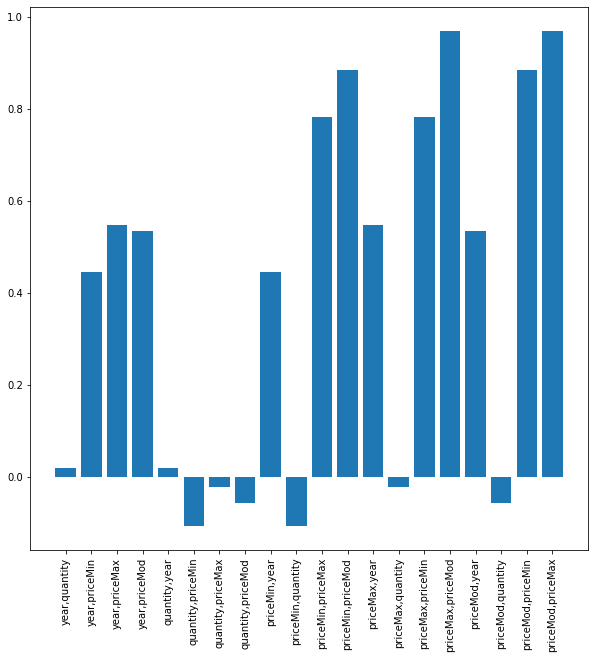

In [0]:
cc = {}
#Plot Auto correlation for Numeric columns 
print("cross-correlation of Numeric Columns:")
for col in df.columns:
    if (np.issubdtype(df[col],np.number)):
        for col2 in df.columns:
            if(np.issubdtype(df[col2],np.number) and col != col2):

                cc[col+','+col2] = np.corrcoef([df[col],df[col2]])[0][1]
                print(f'{col},{col2} \n {autocorr(df[col],df[col2])[0][1]}\n')

fig = plt.figure(figsize=(10,10))
chart = plt.bar(range(len(cc)), list(cc.values()), align='center')
XAxis = plt.xticks(range(len(cc.keys())), list(cc.keys()),rotation=90)

df2 = pd.DataFrame.from_dict(cc,orient='index',columns=['AR Coeff'])
df2.index

In [0]:
cc= {}
cc['a'+','+'b'] = 'c'
cc

{'a,b': 'c'}

In [0]:
np.corrcoef([df['priceMin'],df['priceMod'],df['priceMax']])

array([[1.       , 0.8833961, 0.7817363],
       [0.8833961, 1.       , 0.9680688],
       [0.7817363, 0.9680688, 1.       ]])

Autocorrelation of Numeric Columns:
year 
 0.9993907388747799

quantity 
 0.029485417832919934

priceMin 
 0.5199969194910414

priceMax 
 0.9040485647768035

priceMod 
 0.8536889107587399



,AR Coeff
quantity,0.029485
priceMin,0.519997
priceMod,0.853689
priceMax,0.904049
year,0.999391


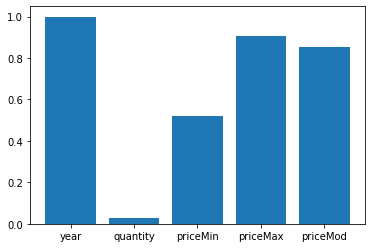

In [0]:
ac = {}
#Plot Auto correlation for Numeric columns 
print("Autocorrelation of Numeric Columns:")
for col in df.columns:
    if (np.issubdtype(df[col],np.number)):
        
        ac[col] = autocorr(df[col])[0][1]
        print(f'{col} \n {autocorr(df[col])[0][1]}\n')

x = plt.bar(range(len(ac)), list(ac.values()), align='center')
y = plt.xticks(range(len(ac)), list(ac.keys()))

pd.DataFrame.from_dict(ac,orient='index',columns=['AR Coeff']).sort_values(['AR Coeff'])

### Visual Autocorrelation and Cross correlation functions

In [0]:
def autocorr(x,y=None,t=1):
    if y is not None:
        return np.corrcoef(np.array([x,y]))
    else:
        return np.corrcoef(np.array([x[:-t], x[t:]]))  ## Pearsons Correlation Coeff

In [0]:
def visual_autocorr(df,targetcol = None):
	ac = {}
	#Plot Auto correlation for Numeric columns 
	print("Autocorrelation of Numeric Columns:")
	for col in df.columns:
		if (np.issubdtype(df[col],np.number)):
			
			ac[col] = autocorr(df[col])[0][1]
			print(f'{col} \n {autocorr(df[col])[0][1]}\n')
	
	x = plt.bar(range(len(ac)), list(ac.values()), align='center')
	y = plt.xticks(range(len(ac)), list(ac.keys()),rotation=90)
	
	print(pd.DataFrame.from_dict(ac,orient='index',columns=['AR Coeff']).sort_values(['AR Coeff']))

In [0]:
def clean_array(ar):
    if type(ar) == pd.core.series.Series:
        return ar.dropna().to_numpy()
    else:
        return ar    

In [0]:
def visual_crosscorr(df,targetcol = None):
    cc = {}
    #Plot Auto correlation for Numeric columns 
    print("cross-correlation of Numeric Columns:")
    for col in df.columns:
        if (np.issubdtype(df[col],np.number)):
            for col2 in df.columns:
                if(np.issubdtype(df[col2],np.number) and col != col2 and col2 + ',' + col not in cc.keys() ):
                    cc[col+','+col2] = np.corrcoef([df[col],df[col2]])[0][1]
                    print(f'{col},{col2} \n {np.corrcoef(df[col],df[col2])[0][1]}\n')
    plt.figure(figsize=(8,8))
    x = plt.bar(range(len(cc)), list(cc.values()), align='center')
    y = plt.xticks(range(len(cc)), list(cc.keys()),rotation=90)

    print(pd.DataFrame.from_dict(cc,orient='index',columns=['AR Coeff']).sort_values(['AR Coeff',]))


#### Markjet Arrivals DB


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df["month"] = df["month"].str.capitalize()
df["month"] = pd.to_datetime(df.month, format='%B', errors='coerce')
df = df.sort_values(by=['year', 'month'])
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
5399,LASALGAON(MS),1900-01-01,1996,225063,160,257,226,MS,LASALGAON,January-1996
5420,LASALGAON(MS),1900-02-01,1996,196164,133,229,186,MS,LASALGAON,February-1996
5441,LASALGAON(MS),1900-03-01,1996,178992,155,274,243,MS,LASALGAON,March-1996
5461,LASALGAON(MS),1900-04-01,1996,192592,136,279,254,MS,LASALGAON,April-1996
5481,LASALGAON(MS),1900-05-01,1996,237574,154,312,269,MS,LASALGAON,May-1996
...,...,...,...,...,...,...,...,...,...,...
9610,SURAT(GUJ),1900-02-01,2016,29450,697,1269,983,GUJ,SURAT,February-2016
9799,UDAIPUR(RAJ),1900-02-01,2016,4422,289,1006,656,RAJ,UDAIPUR,February-2016
9920,VANI(MS),1900-02-01,2016,42275,522,1006,688,MS,VANI,February-2016
10004,VARANASI(UP),1900-02-01,2016,17300,1415,1465,1433,UP,VARANASI,February-2016


Autocorrelation of Numeric Columns:
year 
 0.9999489786398241

quantity 
 0.02949102997221617

priceMin 
 0.5200152730340076

priceMax 
 0.9040930534045767

priceMod 
 0.853728771209357

          AR Coeff
quantity  0.029491
priceMin  0.520015
priceMod  0.853729
priceMax  0.904093
year      0.999949


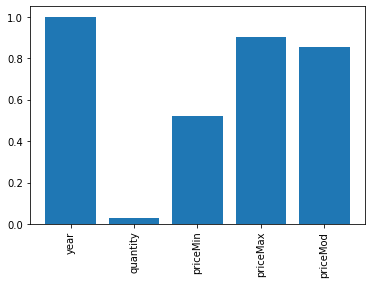

In [0]:
visual_autocorr(df)

cross-correlation of Numeric Columns:
year,quantity 
 0.01835148789435852

year,priceMin 
 0.4455363424024021

year,priceMax 
 0.5480713344008251

year,priceMod 
 0.533262348388007

quantity,priceMin 
 -0.10670833648123128

quantity,priceMax 
 -0.02240625468341754

quantity,priceMod 
 -0.056826583495767226

priceMin,priceMax 
 0.7817363029432361

priceMin,priceMod 
 0.8833960987310543

priceMax,priceMod 
 0.968068796044704

                   AR Coeff
quantity,priceMin -0.106708
quantity,priceMod -0.056827
quantity,priceMax -0.022406
year,quantity      0.018351
year,priceMin      0.445536
year,priceMod      0.533262
year,priceMax      0.548071
priceMin,priceMax  0.781736
priceMin,priceMod  0.883396
priceMax,priceMod  0.968069


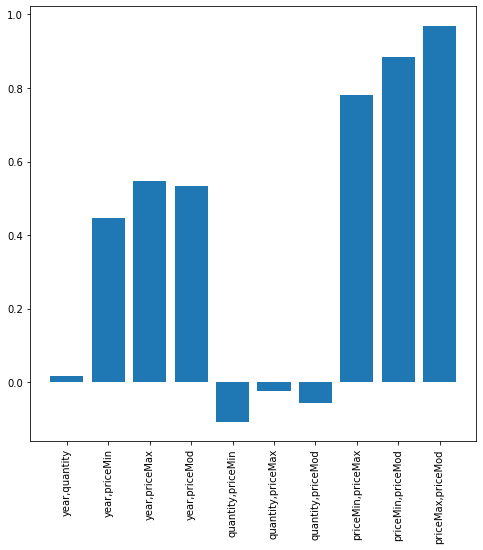

In [0]:
visual_crosscorr(df)

cross-correlation of Numeric Columns:
year,quantity 
 0.01835148789435852

year,priceMin 
 0.4455363424024021

year,priceMax 
 0.5480713344008251

year,priceMod 
 0.533262348388007

quantity,priceMin 
 -0.10670833648123128

quantity,priceMax 
 -0.02240625468341754

quantity,priceMod 
 -0.056826583495767226

priceMin,priceMax 
 0.7817363029432361

priceMin,priceMod 
 0.8833960987310543

priceMax,priceMod 
 0.968068796044704



,AR Coeff
"year,quantity",0.018351
"year,priceMin",0.445536
"year,priceMax",0.548071
"year,priceMod",0.533262
"quantity,priceMin",-0.106708
"quantity,priceMax",-0.022406
"quantity,priceMod",-0.056827
"priceMin,priceMax",0.781736
"priceMin,priceMod",0.883396
"priceMax,priceMod",0.968069


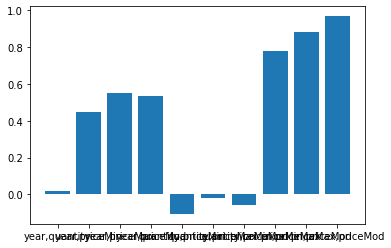

In [0]:
cc = {}
#Plot Auto correlation for Numeric columns 
print("cross-correlation of Numeric Columns:")
for col in df.columns:
    if (np.issubdtype(df[col],np.number)):
        for col2 in df.columns:
            if(np.issubdtype(df[col2],np.number) and col != col2 and col2 + ',' + col not in cc.keys() ):

                cc[col+','+col2] = np.corrcoef([df[col],df[col2]])[0][1]
                print(f'{col},{col2} \n {autocorr(df[col],df[col2])[0][1]}\n')

x = plt.bar(range(len(cc)), list(cc.values()), align='center')
y = plt.xticks(range(len(cc)), list(cc.keys()))

pd.DataFrame.from_dict(cc,orient='index',columns=['AR Coeff'])


#### Metro Traffic DB

In [0]:
#Metro Interstate Traffic dataset

df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz', compression='gzip')
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


Autocorrelation of Numeric Columns:
temp 
 0.9809775975426078

rain_1h 
 0.00030553663881707343

snow_1h 
 0.8506973445889162

clouds_all 
 0.8277928377882251

traffic_volume 
 0.9127024656313528

                AR Coeff
rain_1h         0.000306
clouds_all      0.827793
snow_1h         0.850697
traffic_volume  0.912702
temp            0.980978


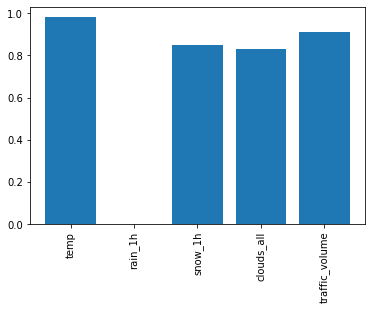

In [0]:
visual_autocorr(df)

cross-correlation of Numeric Columns:
temp,rain_1h 
 0.009068543818750803

temp,snow_1h 
 -0.019755240814995145

temp,clouds_all 
 -0.10197641837381434

temp,traffic_volume 
 0.13029879817112658

rain_1h,snow_1h 
 -8.98345638803308e-05

rain_1h,clouds_all 
 0.004818130850507404

rain_1h,traffic_volume 
 0.00471370236785923

snow_1h,clouds_all 
 0.027930938996974443

snow_1h,traffic_volume 
 0.0007334345358283799

clouds_all,traffic_volume 
 0.06705377704283502

                           AR Coeff
temp,clouds_all           -0.101976
temp,snow_1h              -0.019755
rain_1h,snow_1h           -0.000090
snow_1h,traffic_volume     0.000733
rain_1h,traffic_volume     0.004714
rain_1h,clouds_all         0.004818
temp,rain_1h               0.009069
snow_1h,clouds_all         0.027931
clouds_all,traffic_volume  0.067054
temp,traffic_volume        0.130299


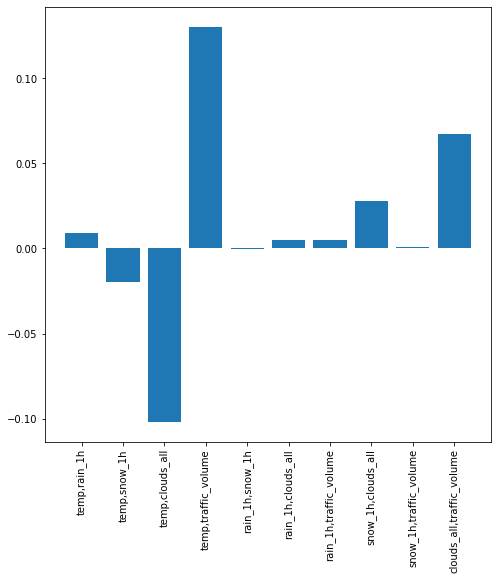

In [0]:
visual_crosscorr(df)

#### Bank DB


In [0]:
#bank dataset

zf = zipfile.ZipFile('bank.zip') 
df = pd.read_csv(zf.open('bank.csv'),sep=';')
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Autocorrelation of Numeric Columns:
age 
 -0.023449313555924455

balance 
 0.004892706337465337

day 
 0.00404190637815642

duration 
 0.01844538926147213

campaign 
 -0.013199730640155992

pdays 
 -0.015173495720525813

previous 
 0.014491033238146085

          AR Coeff
age      -0.023449
pdays    -0.015173
campaign -0.013200
day       0.004042
balance   0.004893
previous  0.014491
duration  0.018445


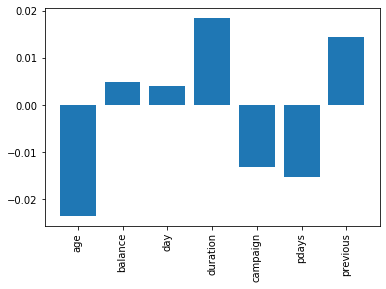

In [0]:
visual_autocorr(df)

cross-correlation of Numeric Columns:
age,balance 
 0.08382014224477764

age,day 
 -0.017852632122577324

age,duration 
 -0.0023668894512521433

age,campaign 
 -0.005147904715096073

age,pdays 
 -0.008893530331566266

age,previous 
 -0.0035109166574200834

balance,day 
 -0.008677052058808973

balance,duration 
 -0.01594991844366675

balance,campaign 
 -0.009976165700708249

balance,pdays 
 0.009436675990853882

balance,previous 
 0.026196357212844374

day,duration 
 -0.024629306495641982

day,campaign 
 0.1607060691390429

day,pdays 
 -0.09435151957139068

day,previous 
 -0.05911439404177686

duration,campaign 
 -0.06838199990315438

duration,pdays 
 0.010380242157660351

duration,previous 
 0.01808031720394202

campaign,pdays 
 -0.09313681840575065

campaign,previous 
 -0.06783263049126342

pdays,previous 
 0.5775618266478828

                   AR Coeff
day,pdays         -0.094352
campaign,pdays    -0.093137
duration,campaign -0.068382
campaign,previous -0.067833
day,previous      -0

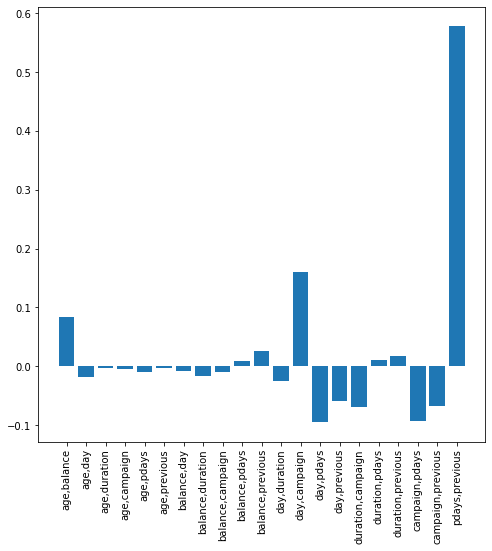

In [0]:
visual_crosscorr(df)

#### UFC DB


In [0]:
!kaggle datasets download -d rajeevw/ufcdata
zf = zipfile.ZipFile('ufcdata.zip') 
df = pd.read_csv(zf.open('data.csv'),sep=',')
df = df[['R_fighter','B_fighter','date','no_of_rounds','R_age','B_age','R_Weight_lbs','B_Weight_lbs']]
print(df.size)
df.dropna()
df

ufcdata.zip: Skipping, found more recently modified local copy (use --force to force download)
41152


,R_fighter,B_fighter,date,no_of_rounds,R_age,B_age,R_Weight_lbs,B_Weight_lbs
0,Henry Cejudo,Marlon Moraes,2019-06-08,5,32.0,31.0,135.0,135.0
1,Valentina Shevchenko,Jessica Eye,2019-06-08,5,31.0,32.0,125.0,125.0
2,Tony Ferguson,Donald Cerrone,2019-06-08,3,35.0,36.0,155.0,155.0
3,Jimmie Rivera,Petr Yan,2019-06-08,3,29.0,26.0,135.0,135.0
4,Tai Tuivasa,Blagoy Ivanov,2019-06-08,3,26.0,32.0,264.0,250.0
...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,1993-11-12,1,34.0,NaN,216.0,275.0
5140,Ken Shamrock,Patrick Smith,1993-11-12,1,29.0,30.0,205.0,225.0
5141,Royce Gracie,Art Jimmerson,1993-11-12,1,26.0,30.0,175.0,196.0
5142,Kevin Rosier,Zane Frazier,1993-11-12,1,NaN,NaN,275.0,250.0


In [0]:
df['B_age'][0]


31.0

In [0]:
clean_array(df['B_age'])

array([31., 32., 36., ..., 30., 30., 24.])

In [0]:
def visual_autocorr_series(df,targetcol = None):
	ac = {}
	#Plot Auto correlation for Numeric columns 
	print("Autocorrelation of Numeric Columns:")
	for col in df.columns:
		if (np.issubdtype(df[col],np.number)):
			
			ac[col] = autocorr(clean_array(df[col]))[0][1]
			print(f'{col} \n {autocorr(clean_array(df[col]))[0][1]}\n')
	
	x = plt.bar(range(len(ac)), list(ac.values()), align='center')
	y = plt.xticks(range(len(ac)), list(ac.keys()))
	
	print(pd.DataFrame.from_dict(ac,orient='index',columns=['AR Coeff']).sort_values(['AR Coeff']))

Autocorrelation of Numeric Columns:
no_of_rounds 
 0.24414858504466416

R_age 
 0.09217737371167742

B_age 
 0.035602429371391416

R_Weight_lbs 
 0.14997847655537747

B_Weight_lbs 
 0.17139045873046707

              AR Coeff
B_age         0.035602
R_age         0.092177
R_Weight_lbs  0.149978
B_Weight_lbs  0.171390
no_of_rounds  0.244149


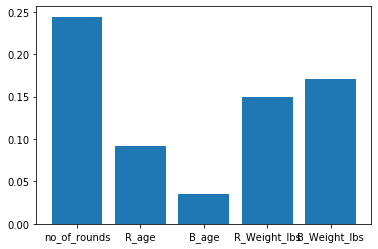

In [0]:
visual_autocorr_series(df)

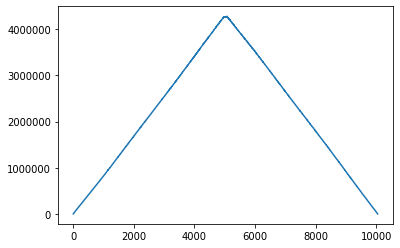

In [0]:
plt.plot(np.correlate(df['B_age'].dropna().to_numpy(),df['R_age'].dropna().to_numpy(),'full'))

In [0]:
autocorr(df[col].dropna().to_numpy()[:len(df[col2])],df[col2].dropna().to_numpy()[:len(df[col])])

ValueError: ignored

In [0]:
cc = {}
    #Plot Auto correlation for Numeric columns 
    
print("cross-correlation of Numeric Columns:")
for col in df.columns:
    if (np.issubdtype(df[col],np.number)):
        for col2 in df.columns:
            if(np.issubdtype(df[col2],np.number) and col != col2):
                
                cc[col+','+col2] = np.corrcoef([df[col].dropna(),df[col2].dropna()])[0][1]
                print(f'{col},{col2} \n {np.corrcoef([df[col].dropna(),df[col2].dropna()])[0][1]}\n')
#                print(f'{col},{col2} \n {np.corrcoef([df[col].dropna().to_numpy(),df[col2].dropna().to_numpy()])}\n')

x = plt.bar(range(len(cc)), list(cc.values()), align='center')
y = plt.xticks(range(len(cc)), list(cc.keys()),rotation=90)

#print(pd.DataFrame.from_dict(cc,orient='index',columns=['AR Coeff']).sort_values(['AR Coeff','']))

cross-correlation of Numeric Columns:


ValueError: ignored

# New Section

In [0]:
def visual_crosscorr_series(df,targetcol = None):
    cc = {}
    #Plot Auto correlation for Numeric columns 
    print("cross-correlation of Numeric Columns:")
    for col in df.columns:
        if (np.issubdtype(df[col],np.number)):
            for col2 in df.columns:
                if(np.issubdtype(df[col2],np.number) and col != col2):

                    cc[col+','+col2] = np.corrcoef([df[col].to_numpy(),df[col2].to_numpy()])[0][1]
                    print(f'{col},{col2} \n {np.corrcoef([df[col].to_numpy(),df[col2].to_numpy()])[0][1]}\n')

    x = plt.bar(range(len(cc)), list(cc.values()), align='center')
    y = plt.xticks(range(len(cc)), list(cc.keys()),rotation=90)

    print(pd.DataFrame.from_dict(cc,orient='index',columns=['AR Coeff']).sort_values(['AR Coeff','']))

cross-correlation of Numeric Columns:
no_of_rounds,R_age 
 nan

no_of_rounds,B_age 
 nan

no_of_rounds,R_Weight_lbs 
 nan

no_of_rounds,B_Weight_lbs 
 nan

R_age,no_of_rounds 
 nan

R_age,B_age 
 nan

R_age,R_Weight_lbs 
 nan

R_age,B_Weight_lbs 
 nan

B_age,no_of_rounds 
 nan

B_age,R_age 
 nan

B_age,R_Weight_lbs 
 nan

B_age,B_Weight_lbs 
 nan

R_Weight_lbs,no_of_rounds 
 nan

R_Weight_lbs,R_age 
 nan

R_Weight_lbs,B_age 
 nan

R_Weight_lbs,B_Weight_lbs 
 nan

B_Weight_lbs,no_of_rounds 
 nan

B_Weight_lbs,R_age 
 nan

B_Weight_lbs,B_age 
 nan

B_Weight_lbs,R_Weight_lbs 
 nan



KeyError: ignored

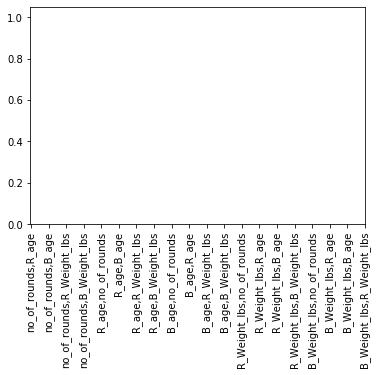

In [0]:
visual_crosscorr_series(df)

#### Suicide Dataset

In [0]:
!kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016
zf = zipfile.ZipFile('suicide-rates-overview-1985-to-2016.zip') 
df = pd.read_csv(zf.open('master.csv'),sep=',')
df

## Datasets with Descrptions

  1. Air Quality dataset [link](https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip)

  2. Date-Value pair dataset from [this](https://www.machinelearningplus.com/time-series/time-series-analysis-python/) tutorial [link]('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv)

  3. Indian Imports Dataset [link](https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv)



In [0]:
#download some databases
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!wget https://www.kaggle.com/rajeevw/ufcdata/download
!kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016
%clear

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016
%clear

In [0]:
#!rm ~/.kaggle/kaggle.json
!ls -a ~/.kaggle


In [0]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
ser.head(n=20)
#pd.unique(ser['city'])
abohar = ser.loc[ser.market == 'ABOHAR(PB)',:]
abohar
#abohar.head()
#abohar.size
mumbai = ser.loc[ser.market == 'MUMBAI',:]
mumbai

In [0]:
plt.figure(figsize=(15,10))
plt.plot(abohar['date'].head(),abohar['priceMin'].head(),'-',linestyle='dashed')
plt.plot(abohar['date'].head(),abohar['priceMod'].head(),'.-')
plt.plot(abohar['date'].head(),abohar['priceMax'].head(),'-',linestyle='dashed')
plt.legend()
plt.show()

In [0]:
plt.figure(figsize=(15,10))
plt.plot(mumbai['date'].head(),mumbai['priceMin'].head(),'-',linestyle='dashed')
plt.plot(mumbai['date'].head(),mumbai['priceMod'].head(),'.-')
plt.plot(mumbai['date'].head(),mumbai['priceMax'].head(),'-',linestyle='dashed')
plt.legend()
plt.show()

## Resources
I found a python package that has several sample datasets for us to try on at : https://legacy.quiltdata.com/package/uciml/

https://otexts.com/fpp2/classical-decomposition.html

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

In [0]:
import numpy as np
import pandas as pd
import sklearn as skl
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip

In [0]:
!unzip -o AirQualityUCI.zip

In [0]:
data = pd.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data.dropna(axis=0)
data.shape

In [0]:
data.head(10)

In [0]:
data['Date'][:10]

In [0]:
data["T"].autocorr(lag=20)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data["NMHC(GT)"])
plt.show()

In [0]:
visual_autocorr(data)

In [0]:
!pip install PyPR


In [0]:
x = np.random.randn(100)
statsmodels.stats.diagnostic.acorr_ljungbox(x,lags=20)
#acorr_ljungbox(x, lags=20)  #lags is the largest lag to report


In [0]:
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels import stats

N = 10000
T = 100

x = np.random.normal(0, 1, T)
_, pvalues = statsmodels.stats.diagnostic.acorr_ljungbox(x)
ret = np.zeros(shape=pvalues.shape)

for i in range(N):
    x = np.random.normal(0,1,T)
    _, pvalues = statsmodels.stats.diagnostic.acorr_ljungbox(x)
    ret += (pvalues<0.05).astype(int)

ret /= N
print(ret)

In [0]:
from statsmodels.stats.diagnostic import acorr_ljungbox

#from pypr.stattest.ljungbox import *
import scipy.stats


x = np.random.randn(100)
#rg = genfromtxt('sunspots/sp.dat')
#x = rg[:,1] # Just use number of sun spots, ignore year
h = 20 # Number of lags
lags = range(h)
sa = np.zeros((h))
for k in range(len(lags)):
    sa[k] = sac(x, k)
figure()
markerline, stemlines, baseline = stem(lags, sa)
grid()
title('Sample Autocorrealtion Function (ACF)')
ylabel('Sample Autocorrelation')
xlabel('Lag')
h, pV, Q, cV = lbqtest(x, range(1, 20), alpha=0.1)
print( 'lag   p-value          Q    c-value   rejectH0')
for i in range(len(h)):
    print("%-2d %10.3f %10.3f %10.3f      %s" % (i+1, pV[i], Q[i], cV[i], str(h[i])))

In [0]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser.head()

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')


In [0]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

## Seasonal Data


In [0]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)


In [0]:
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [0]:
df


In [0]:
df[['value','year','month']]

## Grouping Time-series data

In [0]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [0]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

## Breaking down a time-series

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

### Breakdown series function

In [0]:
def breakdown_series(series):
    from statsmodels.tsa.seasonal import seasonal_decompose
    from dateutil.parser import parse

    # Import Data
    # df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

    # Multiplicative Decomposition 
    result_mul = seasonal_decompose(series, model='multiplicative', extrapolate_trend='freq')

    # Additive Decomposition
    result_add = seasonal_decompose(series, model='additive', extrapolate_trend='freq')

    # Plot
    plt.rcParams.update({'figure.figsize': (10,10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
    result_add.plot().suptitle('Additive Decompose', fontsize=22)
    plt.show()

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
breakdown_series(df['value'])

Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of the series.

In [0]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed,result_mul.seasonal*result_mul.trend*result_mul.resid], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values','product']
df_reconstructed.head()

In [0]:
#Panel style dataset of electricity consumption of a single household over 4 years

!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip -o household_power_consumption.zip


In [0]:
import glob
glob.glob('household*')
!unzip household_power_consumption.zip

In [0]:
!head household_power_consumption.txt

In [0]:
df = pd.read_csv('household_power_consumption.txt',sep=';',low_memory=False,header=0,infer_datetime_format=True,parse_dates={'datetime':[0,1]},index_col=['datetime'])
df

In [0]:
df.keys()

In [0]:
df.size

In [0]:
x = ['SarimaP','b','c','arima4']

In [0]:
import re


In [0]:
for i in x:
  tf = re.match(r"^.*[ARIMA].*",i.upper())
  if(tf):
    print(tf.string)

### Statsmodels - a quick start

In [0]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices #lbrary for describing stat models and building design matrices using r like formulas
import matplotlib.pyplot as plt

In [0]:
df = sm.datasets.grunfeld

In [0]:
df = df.load_pandas()

In [0]:
df

In [0]:
df.keys()

In [0]:
df.data

In [0]:
labels = list(df.data.keys())

In [0]:
labels

In [0]:
df.data[-5:]

In [0]:
data = df.data

In [0]:
data = data.dropna()

In [0]:
firms = list(data['firm'].unique())

In [0]:
firms

In [0]:
GM = data.loc[data['firm']=='General Motors']
GM.dropna(axis=1)
GM[:20]

In [0]:
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(2,2,1)
plt.plot(GM['year'],GM['value'])
plt.xlabel('Year')
plt.ylabel('Value')
fig.add_subplot(2,2,2)
plt.plot(GM['year'],GM['capital'])
plt.xlabel('year')
plt.ylabel('capital')
fig.add_subplot(2,2,3)
plt.plot(GM['year'],GM['invest'])
plt.xlabel('year')
plt.ylabel('invest')

In [0]:
fig, axs = plt.subplots(1, 1)
fig.figsize = (20,20)
axs.plot(GM['year'], GM['capital'], GM['year'], GM['value'],GM['year'],GM['invest'])
axs.grid(True)
axs.legend()

In [0]:
pd.unique(data['firm'])

In [0]:
IBM = data.loc[data['firm'] == 'IBM']

In [0]:
IBM

In [0]:
fig, axs = plt.subplots(1, 1)
#fig.figsize = (10,10)
axs.plot(IBM['year'], IBM['capital'], IBM['year'],IBM['value'],IBM['year'],IBM['invest'])
axs.grid(True)
axs.legend()

In [0]:
sm.tsa.acf(IBM['value'],nlags=10),sm.tsa.acf(IBM['invest'],nlags=10),sm.tsa.acf(IBM['capital'],nlags=10)

In [0]:
sm.tsa.pacf(IBM['value'],nlags=10),sm.tsa.pacf(IBM['invest'],nlags=10),sm.tsa.pacf(IBM['capital'],nlags=10)

In [0]:
sm.graphics.tsa.plot_acf(IBM['value'],lags=19)

In [0]:
sm.graphics.tsa.plot_pacf(IBM['value'],lags=19)

In [0]:
visual_autocorr(IBM)

In [0]:
visual_crosscorr(IBM)

In [0]:
visual_autocorr(GM)

In [0]:
visual_crosscorr(GM)

## Joaquim's Functions

In [0]:
def analyze(serie, lags=20, plot=True, verbose=False):
  '''
  Analysis a 1D series for autocorrelation.
  INPUT
  serie: numerical array to be analyzed
  lags: number of temporal lags up to where to test for autocorrelation
  plot: TRUE if you want to plot results
  OUTPUT
  test: TRUE if autocorrleation is both statistically and quantitative significant
  result: acumulation of all significant autocorrelations at different lags
  '''
  if len(serie)<lags: #if lags is larger than the length of the series it changes the value 
    lags = int(np.floor(len(serie)/2))
    
  _, p = acorr_ljungbox(serie, lags=lags) # ljung-box test, where p is the statitical significance for each lag
  
  acf_x, confint = acf(serie, nlags=lags, alpha=0.05, fft=False, unbiased=False) #autocorrelation function
  q_thrhld = 0.5  # quantitative threshold for considering an autocorrelation value in the analysis (not the same as statistically significant)
  s_thrhld = 0.05 # statistically significant threshold 
  # filters those acorr values not significants (both statistical and quantitative)
  signif = ((acf_x > (confint[:,1]-acf_x)) | (acf_x < (confint[:,0]-acf_x))) & ((acf_x > q_thrhld) | (acf_x < -q_thrhld))
  signif[0] = False # remove lag 0
  result = sum([np.abs(x) for x, y in zip(acf_x, signif) if y == True]) # acum of all autocorr

  if plot:
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,figsize=(35,3))
    ax1.plot(serie) # plot series in time
    plot_acf(serie, lags=lags, ax=ax2); # plot autocorrelation
    plot_pacf(serie, lags=lags, ax=ax3); # plot partial autocorrelation
    ax4.stem(p, basefmt=" ", use_line_collection=True) # plot ljung-box test significance values
    ax4.plot([0,lags],[s_thrhld,s_thrhld],'r') # plot ljung-box test significance threshold
    print(mk.original_test(serie))
  test = any(p<s_thrhld) and any(signif) # True if there is any significant acorr
  return test, result 

In [0]:
def analyzeDB(df):
  '''
  Analysis a 2D database for autocorrelation in every column.
  INPUT
  df: panda dataframe
  OUTPUT
  cols: attributes with autocorrelation
  acum_corr: list of autocorrelation for each attribute
  '''
  columns = list(df) # name of each attribute
  test=[]
  acum_corr = []

  for i in columns: # for each attribute
    if np.issubdtype(df[i].dtype, np.number): # if it is numerical
      itest , iacum_corr = analyze(df[i], plot=False) # analyze it for acorr
      test = np.append(test, itest) # append the boolean result
      acum_corr = np.append(acum_corr, iacum_corr) # append the acorr value
    else: # if not just add as it does not have acorr
      test = np.append(test, 0)
      acum_corr = np.append(acum_corr, 0)

  cols = [x for x, y in zip(columns, test) if y == 1] # keep attributes with acorr
  acum_corr = [x for x, y in zip(acum_corr, test) if y == 1] # keep values with acorr
  if not acum_corr: #if none attribute had acorr create one with 0
    acum_corr = [0]
  return cols, acum_corr


In [0]:
def analyzeDB_attGrouping(df, verbose=False):
  '''
  Analysis a 2D database for autocorrelation in every column by grouping each column by same-value rows
  INPUT
  df: panda dataframe
  OUTPUT
  summary_df: panda datafram with [rows: list of attributes], [columns: metrics to evaluate temporal dependence]
    metrics=['% data','groups', 'avg_temp_att', 'std', 'avg_corr', 'max_corr'] (see paper for explanation)
  results: dictionary with [key:attributes][key:value in that attribute]=[list of attributes with acorr, list of attributes' acorrs]
  '''
  results = dict()

  for col in list(df): # for each column
    results[col] = dict() # create an entry in a dictionary
    for att in df[col].unique(): # for each unique value
      try:
        corr_att, corrs = analyzeDB(df.loc[df[col] == att]) # filter the df by that value and look for columns with acorr
        if corr_att and corrs: # if any was found
          results[col][att] = [corr_att, corrs] # add it to the dictionary
          if verbose:
            print("Attribute, value, length:",col, att, len(df.loc[df[col] == att]))
            print(corr_att)
            print(corrs)
      except:
        pass

  summary = copy.deepcopy(results) 
  
  for key, value in results.items(): # for each column and column values
    list_n_corr_att = []
    list_max_corr = [0]
    acum_grouping = 0
    for key2, value2 in value.items(): # for each column values and the columns with acorr
      _, c = value2
      list_n_corr_att = np.append(list_n_corr_att, len(c)) # append the count of columns with acorr
      list_max_corr = np.append(list_max_corr, np.max(c))  # append the max acorr
      acum_grouping += len(df.loc[df[key] == key2]) # acumulate the rows used
    # add to the dictionary for every column: % data used, groups, avg_temp_att, std, avg_corr, max_corr
    summary[key] = [int(100*acum_grouping/len(df)), len(list_n_corr_att), np.mean(list_n_corr_att), np.std(list_n_corr_att), np.mean(list_max_corr), np.max(list_max_corr)]

  # analyze the df without grouping
  t, c = analyzeDB(df) 
  #add the results to the dict
  summary['no-grouping'] = [100,1, len(t), 0, np.mean(c), np.max(c)]
  #create a dataframe
  summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['% data','groups', 'avg_temp_att', 'std', 'avg_corr', 'max_corr'])
  print("Most probable grouping attribute is:",summary_df[['avg_temp_att']].idxmax().item())
  return summary_df, results

In [0]:
def getTemporalAtt(df, result, summary, filter_att=None):
  '''
  Extract attributes with autocorrelation using analyzeDB_attGrouping() output
  INPUT
  df: panda dataframe
  result: second output from analyzeDB_attGrouping()
  summary: first output from analyzeDB_attGrouping()
  filter_at2t: if not specify it will use the one with higher average of temporal sequences detected
  OUTPUT
  output: panda datafram with [rows: list of attributes with autocorrelation when grouping by filter_att], 
                              [columns: % of unique values (in filter_att) that detected autocorrelation for that row-attribute]
  '''
  if filter_att==None: # if no filter attibute is given
    filter_att = summary[['avg_temp_att']].idxmax().item() # use the one with the highest average of temporal sequences detected
  print("Filter attibute", filter_att)
  groups = summary['groups'][filter_att] # get in how many groups autocorrelated attributes where found
  dicAttCount = dict()
  for key,value in result[filter_att].items(): # for each column value and list of attributes with acorr
    for a in value[0]: # for each attributes with acorr 
      if a not in dicAttCount: # if the attribute is not already in the dict
        dicAttCount[a] = 0 # initialize it with 0
      else:
        dicAttCount[a] +=1 # else increment the count
  for k in dicAttCount.keys(): # for each count
    dicAttCount[k] /= groups/100 # calculate the percentage
  #create the output dataframe
  output = pd.DataFrame.from_dict(dicAttCount, orient='index',columns=['Ocurrences [%]'])
  thr = np.mean(output['Ocurrences [%]'])-np.std(output['Ocurrences [%]']) #calculate a naive threshold
  print('Threshold =', thr)
  return output

### Testing the functions on various datasets

### Automotive Industry Data

In [0]:
GM['capital'].size

In [0]:
GM

In [0]:
analyze(GM['capital'][1:])

In [0]:
analyzeDB(GM[1:])

In [0]:
analyzeDB_attGrouping(GM[1:])

### Indian Markets Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df["month"] = df["month"].str.capitalize()
df["month"] = pd.to_datetime(df.month, format='%B', errors='coerce')
df = df.sort_values(by=['year', 'month'])
df

In [0]:
visual_autocorr(df)

In [0]:
analyze(df['priceMod'])

In [0]:
r,s = analyzeDB(df)

In [0]:
r

In [0]:
s

In [0]:
r, s = analyzeDB_attGrouping(df)

In [0]:
r

In [0]:
s

In [0]:
get

In [0]:
ms = df.loc[df['state'] == 'MS']
ms.size

In [0]:
visual_autocorr(ms)

In [0]:
visual_crosscorr(ms)

In [0]:
analyze(ms['priceMin'])

In [0]:
analyzeDB(ms)

In [0]:
r,s = analyzeDB_attGrouping(ms)

In [0]:
r

In [0]:
getTemporalAtt(df,s,r)

##### <30 samples

In [0]:
ms_sample = ms[:20]

In [0]:
analyze(ms_sample['priceMin'][1:])

In [0]:
analyzeDB(ms_sample[1:])

In [0]:
sample_r,sample_s = analyzeDB_attGrouping(ms_sample[1:])

In [0]:
sample_r

In [0]:
getTemporalAtt(ms_sample,sample_s,sample_r)

##### Exactly 30 samples

the central limit theorem states that for a sample size > 30 samples, it is more likely that the sample distribution of the population resembles a normal distribution.



In [0]:
ms_sample = ms[:30]

In [0]:
analyze(ms_sample['priceMin'][1:])

In [0]:
analyzeDB(ms_sample[1:])

In [0]:
sample_r,sample_s = analyzeDB_attGrouping(ms_sample[1:])

In [0]:
sample_r

In [0]:
getTemporalAtt(ms_sample,sample_s,sample_r)

### Suicides Dataset

### Missing Values Test



#### UFC Data


In [0]:
!kaggle datasets download -d rajeevw/ufcdata
zf = zipfile.ZipFile('ufcdata.zip') 
df = pd.read_csv(zf.open('data.csv'),sep=',')
df = df[['R_fighter','B_fighter','date','no_of_rounds','R_age','B_age','R_Weight_lbs','B_Weight_lbs']]
print(df.size)
df.dropna()
df

ufcdata.zip: Skipping, found more recently modified local copy (use --force to force download)
41152


,R_fighter,B_fighter,date,no_of_rounds,R_age,B_age,R_Weight_lbs,B_Weight_lbs
0,Henry Cejudo,Marlon Moraes,2019-06-08,5,32.0,31.0,135.0,135.0
1,Valentina Shevchenko,Jessica Eye,2019-06-08,5,31.0,32.0,125.0,125.0
2,Tony Ferguson,Donald Cerrone,2019-06-08,3,35.0,36.0,155.0,155.0
3,Jimmie Rivera,Petr Yan,2019-06-08,3,29.0,26.0,135.0,135.0
4,Tai Tuivasa,Blagoy Ivanov,2019-06-08,3,26.0,32.0,264.0,250.0
...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,1993-11-12,1,34.0,NaN,216.0,275.0
5140,Ken Shamrock,Patrick Smith,1993-11-12,1,29.0,30.0,205.0,225.0
5141,Royce Gracie,Art Jimmerson,1993-11-12,1,26.0,30.0,175.0,196.0
5142,Kevin Rosier,Zane Frazier,1993-11-12,1,NaN,NaN,275.0,250.0


Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-15.453443222812425, Tau=-0.1442158773272065, s=-1860480.0, var_s=14494359304.0, slope=-0.000598623166716552)


(False, 0)

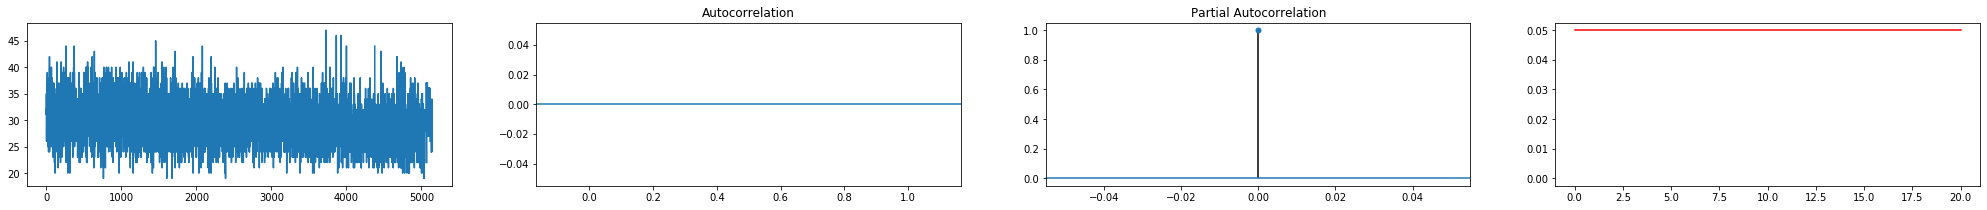

In [0]:
analyze(df['R_age'])

In [0]:
analyzeDB(df)

([], [0])

In [0]:
r,s = analyzeDB_attGrouping(df)

Most probable grouping attribute is: R_age


In [0]:
r

,% data,groups,avg_temp_att,std,avg_corr,max_corr
R_fighter,32,128,1.226562,0.471282,0.777956,1.636042
B_fighter,7,34,1.147059,0.354165,0.685456,0.833333
date,7,36,1.083333,0.276385,0.638541,0.758162
no_of_rounds,0,0,NaN,NaN,0.000000,0.000000
R_age,0,1,2.000000,0.000000,0.256189,0.512379
B_age,0,1,1.000000,0.000000,0.291667,0.583333
R_Weight_lbs,3,9,1.222222,0.415740,0.801143,1.450350
B_Weight_lbs,3,8,1.125000,0.330719,0.652947,1.106157
no-grouping,100,1,0.000000,0.000000,0.000000,0.000000


In [0]:
s

{'B_Weight_lbs': {200.0: [['no_of_rounds'], [0.75]],
  225.0: [['no_of_rounds'], [0.7991593567251463]],
  230.0: [['no_of_rounds'], [1.106157469717362]],
  240.0: [['no_of_rounds'], [0.5098548261289685]],
  241.0: [['no_of_rounds', 'B_age'], [0.6238095238095238, 0.6619834710743799]],
  250.0: [['no_of_rounds'], [0.5248094764744864]],
  253.0: [['R_age'], [0.8614439324116742]],
  264.0: [['B_age'], [0.663117788526495]]},
 'B_age': {41.0: [['no_of_rounds'], [0.5833333333333334]]},
 'B_fighter': {'Andre Fili': [['B_age'], [0.6797101449275362]],
  'Andrei Arlovski': [['B_age'], [0.6937172774869109]],
  'Anthony Smith': [['no_of_rounds', 'R_Weight_lbs'],
   [0.6833333333333331, 0.6833333333333332]],
  'CB Dollaway': [['B_age'], [0.5945257274371196]],
  'Charles Oliveira': [['B_age'], [0.8121216824460654]],
  'Chris Camozzi': [['B_age'], [0.7256944444444445]],
  'Chris Lytle': [['B_age'], [0.6515151515151514]],
  'Clay Guida': [['B_age'], [0.7209994385176866]],
  'Dan Henderson': [['B_age'],